# Week 3b: Downloading and embedding a museum dataset

This notebook follows on from [Week-3a-Embeddings-and-cosine-similarity.ipynb](Week-3a-Embeddings-and-cosine-similarity.ipynb), which you should read through before starting the tasks in this notebook.

### Setting up your Python environment

Before you work through this notebook, please follow the instructions in [Setup-and-test-conda-environment.ipynb](Setup-and-test-conda-environment.ipynb)

Once you have done that you will need to make sure that the environment selected to run this notebook and all the other notebooks used in this unit is called `aim`. 

To do this click the **Select kernel** button in the top right corner of this notebook, and then select `aim`.

To make sure that is configured properly, Hit the run cell button (▶) on the cell below:

In [1]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])

aim


Does it output the text `aim`?

If it does not output the text `aim`, please revisit and follow the instructions in [Setup-and-test-conda-environment.ipynb](Setup-and-test-conda-environment.ipynb).

If you still cannot get it working, please raise this with the course instructor. 

## Webscrape data from the Met's website

The following cell runs the python script [download-met-museum-data.py](util/download-met-museum-data.py) located in the [util](util) directory. This code will download scrape images from [The Metropolitan Museum of Art website](https://www.metmuseum.org/). This will randomly download images from page items on this website [like this one](https://www.metmuseum.org/art/collection/search/15000). 

Each time you run the following script you will download a different set of images. By default it will try to find and download 100 data samples at a time, though you can increase this by changing the number that follows the flag `--num_samples`:

In [2]:
!python util/download-met-museum-data.py --num_samples 100

Scraping https://www.metmuseum.org/art/collection/search/98973
Failed to access https://www.metmuseum.org/art/collection/search/98973
Scraping https://www.metmuseum.org/art/collection/search/71077
Downloaded: class-datasets/met_images/71077.jpg
Scraping https://www.metmuseum.org/art/collection/search/89767
Downloaded: class-datasets/met_images/89767.jpg
Scraping https://www.metmuseum.org/art/collection/search/24897
Downloaded: class-datasets/met_images/24897.jpg
Scraping https://www.metmuseum.org/art/collection/search/56843
Downloaded: class-datasets/met_images/56843.jpg
Scraping https://www.metmuseum.org/art/collection/search/32116
Downloaded: class-datasets/met_images/32116.jpg
Scraping https://www.metmuseum.org/art/collection/search/61569
No image found on https://www.metmuseum.org/art/collection/search/61569
Scraping https://www.metmuseum.org/art/collection/search/13407
Downloaded: class-datasets/met_images/13407.jpg
Scraping https://www.metmuseum.org/art/collection/search/27420
Do

Open the folder [class-datasets/met_images](class-datasets/met_images) in the file navigation program for your operating system to see the images that have been downloaded.

## Process museum image dataset with CLIP

The first part of the task today is to calculate an embedding for each image in the dataset you have just scraped from the Met's collection.

First you need to do some imports and load in the same clip model used in the previous notebook:

In [8]:
import os
import numpy as np
from PIL import Image
import torch
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')
model.eval()
print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")

/Users/tbroad/miniconda3/envs/aim/lib/python3.10/site-packages/open_clip/factory.py:380: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


Model parameters: 151,277,313


## Task 1: Write a function to get image embeddings

Your first task is to write a function that returns an image embedding based on a PIL image. You will need to refer back to the sequence of steps taken in Part 3 of [Week-3a-Embeddings-and-cosine-similarity.ipynb](Week-3a-Embeddings-and-cosine-similarity.ipynb) in order to do this. 

The following function `get_clip_embedding_from_PIL_image` should take a PIL image as input, convert it to a torch tensor, calcuate an embedding with CLIP, then conver this back to a numpy array, which should contain a vector of length $512$:

In [ ]:
def get_clip_embedding_from_PIL_image(image):
    #
    # Your code goes here
    #
    return embedding

In [9]:
def get_clip_embedding_from_PIL_image(image):
    image_tensor = preprocess(image).unsqueeze(0)
    with torch.no_grad():
        embedding = model.encode_image(image_tensor).squeeze().numpy()
    return embedding

The following code will run a test your function to see if you have done this correctly. 

If you get an error, you will need to inspect the error to see what the problem is:

In [10]:
test_image = Image.open('media/golden-retriever.jpg').convert("RGB")

embedding = get_clip_embedding_from_PIL_image(test_image)

assert type(embedding) == np.ndarray
assert embedding.shape == (512,)

## Task 2: Process all images with CLIP 

You now need to write a function that will process every in the dataset with the function you wrote. You will need to add these embeddings to a python list called `embedding_list`. This function will also keep track of the image id of every image (extracted from the filename), which will be put into a list called `id_list` (this is done for you):

The function will take a path the an image directory as input and return the two variables `embedding_list` and `id_list`, which should be python lists (containing numpy arrays and ints respectively).

Complete the code for the function below. Inside the `try` block write code that performs the following steps:
1. loads a PIL image from the `image_path` variable
2. Gets a vector embedding using the function from task 1
3. Appends this `embedding` to the list `embedding_list`

In [15]:
def generate_embeddings(image_directory):
    embedding_list = []
    id_list = []

    for image_name in os.listdir(image_directory):
        image_path = os.path.join(image_directory, image_name)
        item_id = os.path.splitext(image_name)[0]
        ids.append(int(item_id))
        try:
            #
            # Code for 
            #
        except Exception as e:
            print(f"Error processing {image_name}: {e}")
        
    return embedding_list, id_list

IndentationError: expected an indented block after 'try' statement on line 9 (1720839183.py, line 13)

In [11]:
def generate_embeddings(image_directory):
    embedding_list = []
    id_list = []

    for image_name in os.listdir(image_directory):
        image_path = os.path.join(image_directory, image_name)
        item_id = os.path.splitext(image_name)[0]
        id_list.append(int(item_id))
        try:
            image = Image.open(image_path).convert("RGB")
            embedding = get_clip_embedding_from_PIL_image(image)
            embedding_list.append(embedding)
        except Exception as e:
            print(f"Error processing {image_name}: {e}")
        
    return embedding_list, id_list

The following code will test your function. If you get an error then you will need to look at the error to determine what has gone wrong:

In [12]:
embedding_list, id_list = generate_embeddings('class-datasets/met_images')

assert len(embedding_list) > 1
assert len(embedding_list) == len(id_list)
assert type(embedding_list[0]) == np.ndarray
assert embedding_list[0].shape == (512,)
assert type(id_list[0]) == int

### Task 3: Convert and save data arrays

The next task is to convert these lists into numpy arrays. Pass these list variables as parameters into the function `np.array( )` to create the new variables `embedding_matrix_np` & `id_array_np`:

In [13]:
embedding_matrix_np = 
id_array_np = 

SyntaxError: invalid syntax (961377812.py, line 1)

In [14]:
embedding_matrix_np = np.array(embedding_list)
id_array_np = np.array(id_list)

The following code will test your function. If you get an error then you will need to look at the error to determine what has gone wrong.

In [15]:
assert type(embedding_matrix_np) == np.ndarray
assert type(id_array_np) == np.ndarray
assert embedding_matrix_np.shape[0] == id_array_np.shape[0] 

You should have now a matrix that contains all the vector embeddings for images in your dataset. Each row in this matrix is it's own embedding:

In [16]:
print(embedding_matrix_np.shape)

(293, 512)


### Task 4: Search image embeddings with text

You now have created a matrix of image embeddings. You can now use the cosine distance as before to compare the compare the similarity of a new vector embedding for a text string, against the embeddings for the images you have calculated. 

Lets get a CLIP embedding for a generic text description of an item:

In [17]:
item_description = 'an antique vase'

text_tensor = open_clip.tokenizer.tokenize(item_description)
with torch.no_grad():
    text_embedding = model.encode_text(text_tensor).squeeze().numpy()

Now your job is to compare this text embedding vector with all the image embedding vectors in the matrix `embedding_matrix_np`. You could do this in a for loop, however there is a much faster way. As this operation is essentially just taking the dot product of a vector with every row of a matrix (which you did in [Week 1](Week-1-Neural-networks-in-numpy-solutions.ipynb)).

This following function is almost identical the function `get_cosine_similarity` in the previous notebook, if you are interested you can compare them to see what changes have been made:

In [18]:
def get_all_cosine_similarities(embeddings_matrix, embedding_vector):
        dot_product = embeddings_matrix @ embedding_vector
        product_of_magnitudes = np.linalg.norm(embeddings_matrix, axis = 1) * np.linalg.norm(embedding_vector)
        return dot_product / product_of_magnitudes

Now you can test this function on your matrix of image embeddings. This will give a list all the cosine similarities:

In [19]:
cosine_sim_array = get_all_cosine_similarities(embedding_matrix_np, text_embedding)
print(cosine_sim_array)

[0.21126422 0.21683437 0.20909591 0.22705023 0.23095313 0.2626516
 0.23832853 0.18280044 0.29692566 0.22281663 0.2323682  0.20207618
 0.1983473  0.21102451 0.21900854 0.1856784  0.22863998 0.276549
 0.22181557 0.21393317 0.2804608  0.20591639 0.20498438 0.21248572
 0.2840216  0.20159929 0.24694455 0.21207218 0.21810973 0.19134037
 0.17237431 0.26583466 0.20963961 0.20876311 0.2376539  0.21215874
 0.19553201 0.26743895 0.2114167  0.19719692 0.1963529  0.22421263
 0.21302705 0.19841352 0.23738006 0.23219717 0.22587582 0.23113433
 0.18863209 0.19430616 0.23309839 0.21809247 0.25211746 0.23414844
 0.25446823 0.20450576 0.2144231  0.23590322 0.20541896 0.2750354
 0.24340011 0.23476294 0.2263193  0.20096083 0.22600807 0.18747821
 0.2510616  0.20101863 0.20772517 0.2361     0.30768564 0.28582513
 0.22025828 0.25277615 0.31991056 0.1847014  0.20364225 0.2565576
 0.22641577 0.22233722 0.22095747 0.2446994  0.30008855 0.2575962
 0.24209861 0.2250203  0.24743107 0.21627147 0.22140099 0.19699751
 

Use the function `np.argmax( )` to create the variable `highest_score_index` that contains the index of the maximum value in the array of cosine similarities. This index will be used to retrieve the item id from the variable `id_list`:

In [ ]:
def get_id_for_most_similar_item(similarity_array, id_list):
    highest_score_index = 
    item_id = id_list[highest_score_index]
    return item_id

In [20]:
def get_id_for_most_similar_item(similarity_array, id_list):
    highest_score_index = np.argmax(similarity_array)
    item_id = id_list[highest_score_index]
    return item_id

The following code will test your function. If you get an error then you will need to look at the error to determine what has gone wrong.

In [21]:
closest_match_id = get_id_for_most_similar_item(cosine_sim_array, id_list)
assert type(closest_match_id) == int
assert closest_match_id in id_list

Now you can take a look at the image and see for yourself how similar it is to the text description:

closest match for text string: 'an antique vase' is the image: class-datasets/met_images/46543.jpg


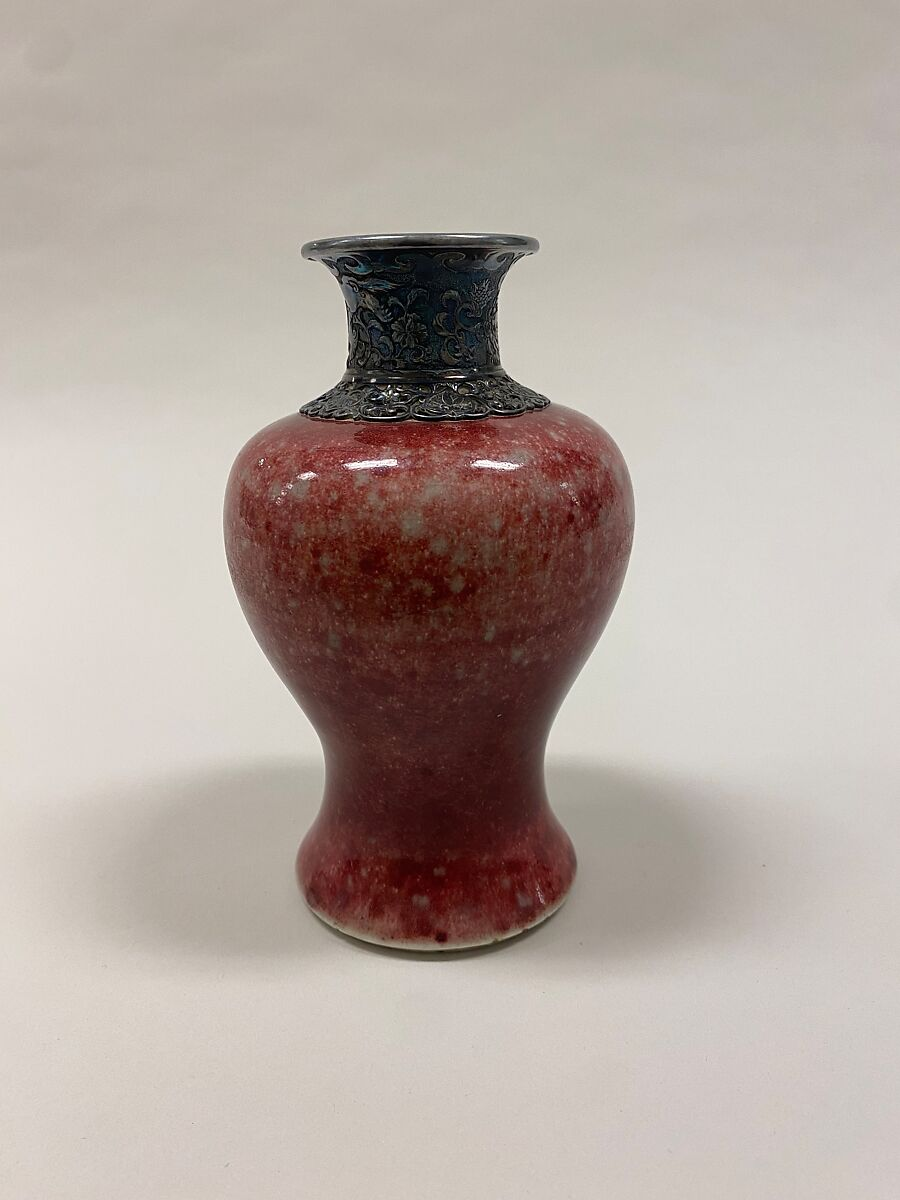

In [22]:
image_path = f'class-datasets/met_images/{closest_match_id}.jpg'
closest_match = Image.open(image_path).convert("RGB")
print(f"closest match for text string: '{item_description}' is the image: {image_path}")
closest_match

### Task 5: Save numpy arrays to file and install library

You will now take what you have done and add the functions and import the embedding arrays into the [sketchy collections streamlit app](week-3c-sketchy-collections-streamlit-app.py). 

First you need to save the numpy arrays to external files:

In [23]:
os.makedirs('demo/embeddings/', exist_ok=True)
np.save('demo/embeddings/met_embeddings.npy', embedding_matrix_np)
np.save('demo/embeddings/met_embedding_ids.npy', id_array_np)

To run the app `week-3c-sketchy-collections-streamlit-app.py` you need to install the following library, for taking sketches as input to the app.

In [91]:
%pip install streamlit-drawable-canvas

Note: you may need to restart the kernel to use updated packages.


### Task 6: Copy functions from this notebook to the app

You now need to take the code you wrote for the tasks here and import them into [week-3c-sketchy-collections-streamlit-app.py](week-3c-sketchy-collections-streamlit-app.py).

Copy and past your implementations for the functions that you wrote:

- `get_clip_embedding_from_PIL_image`
- `get_id_for_most_similar_item`

into the designated space in [week-3c-sketchy-collections-streamlit-app.py](week-3c-sketchy-collections-streamlit-app.py).

### Task 7: Run your streamlit app

You can then run this app to interactively explore the archive you have downloaded. As this app is using the library [streamlit](https://streamlit.io/). Running streamlit apps is differnt to how you normally run python scripts. You need to run this in the correct CLI programme for your operating system, for more information on how to do that follow the steps in [Instructions-for-running-streamlit-apps.ipynb](Instructions-for-running-streamlit-apps.ipynb).

Once you in the correct python CLI programme for your PC, in the `aim` conda environment, and in this directory, you can run `week-3c-sketchy-collections-streamlit-app.py` to itnteract with your code!

This app uses user the CLIP image embeddings of sketches (instead of text) to search the museum dataset, but the code and principal here is identical to what you did in [task 4](#task-4-search-image-embeddings-with-text).
